In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from aiida import load_profile
from aiida.orm import load_group, load_node

load_profile('lauerm-test')

Profile<uuid='f4d23725fea446908276e21eedde97d3' name='lauerm-test'>

In [2]:
original_matrix = np.array([[1/2, 1/2, 0],
                            [0, 1/2, 1/2],
                            [1/2, 0, 1/2]
                            ])

group = load_group(5)

In [3]:
alats = []
energies = []
for node in group.nodes:
    structure = node.inputs['structure'].get_pymatgen()
    lattice = structure.lattice.matrix

    alat = np.matmul(lattice, np.linalg.inv(original_matrix))[1,1]
    
    energy = node.outputs['misc'].get_dict()['total_energies']['energy_extrapolated'] 
    
    alats.append(alat)
    energies.append(energy)

<Axes: >

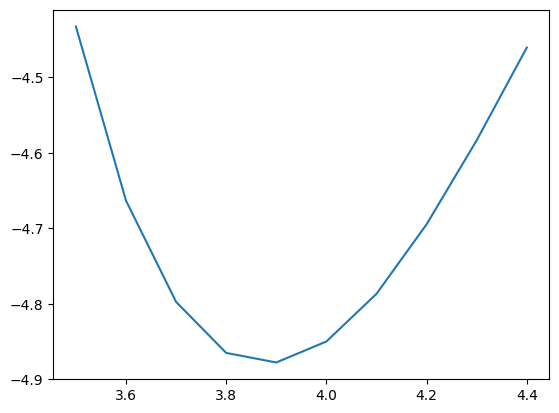

In [4]:
eos_ser = pd.Series(index=alats, data=energies)
eos_ser.plot()